## Análise de Dados com episódios do anime One Piece

### Introdução

Será realizada uma análise completa do conjunto de dados obtido da primeira parte. 

Nossa motivação com esse conjunto de dados é entender sobre padrões e/ou características relacionadas à quantidade de votos e a avaliação média dos telespectadores para cada episódio, contemplando entre diferentes arcos e tipos de episódio.

Os Episódios, Títulos, Votos e Avaliação foram coletados utilizando WebScrapping do site da IMDb e estão em '***episodes.xlsx***'. Com informações da web, complementei os dados pelo Excel com o Tipo e Arco de cada episódio, salvando no arquivo ***'episodes_final.xlsx'***.

### Descrição dos Dados

- ***Episódio***: Número do episódio.
- ***Arco***: O arco em questão que o episódio foi lançado. Arcos são partes de uma história maior, com diferentes objetivos e contextos. Nos animes, existem diversos arcos pertencentes a diferentes sagas, que são semelhantes à temporadas.
- ***Tipo***: O tipo do episódio em questão. Pode ser: 
1) Canônico: O conteúdo do episódio é 100% importante para a narrativa do anime.
2) Semi-Canônico: O conteúdo do episódio é importante para a narrativa do anime mas algumas partes são apenas para completar o tempo do episódio.
3) Filler: O conteúdo do episódio não é importante para a narrativa, abordando um episódio com uma história paralela à história principal.
- ***Título***: Titulo do episódio.
- ***Votos***: Quantidade de votos realizadas pelos telespectadores no site da IMDb.
- ***Avaliação***: Avaliação média dos votos realizados pelos telespectadores no site da IMDb.

### Perguntas a serem respondidas com as análises:

- Qual é a distribuição da avaliação média e quantidade de votos total? 
- Qual ou quais episódios tiveram a avaliação mais alta e qual ou quais tiveram a avaliação mais baixa? 
- Qual a quantidade de episódios de cada tipo? 
- Qual é a avaliação média e quantidade de votos para cada tipo de episódio? 
- Qual é a quantidade de episódios em cada arco? Quais são os maiores? 
- Qual é a avaliação média e quantidade de votos em cada arco? 
- Quais arcos e com quantos episódios com avaliação média acima do 3º quartil (75%) existem? E abaixo do 1º quartil (25%)?
- Há uma correlação entre avaliação e quantidade de votos? 
- A quantidade de votos no anime aumentou ou diminuiu com o tempo? A avaliação média melhorou ou piorou?
- Os fillers foram sendo menos votados e tiveram menos avaliações com o tempo? 

#### Bibliotecas utilizadas nessa parte

In [18]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

#### Leitura do Dataset principal

In [19]:
df = pd.read_excel('.../episodes_final.xlsx')
df

,Episódio,Arco,Tipo,Título,Lançamento,Votos,Avaliação
0,1,Romance Dawn,Semi-Canônico,Ore wa Luffy! Kaizoku Ou ni Naru Otoko Da!,1999-10-20,28293,8.4
1,2,Romance Dawn,Canônico,Daikengo Arawaru! Kaizokugari Roronoa Zoro,1999-11-17,13351,8.3
2,3,Romance Dawn,Canônico,Morgan vs. Luffy! Nazo no Bishoujo wa Dare?,1999-11-24,5868,8.0
3,4,Orange Town,Canônico,Luffy no Kako! Akagami no Shanks Toujou,1999-12-08,4744,8.3
4,5,Orange Town,Canônico,Kyoufu Nazo no Chikara! Kaizoku Douke Buggy-se...,1999-12-15,3120,7.4
...,...,...,...,...,...,...,...
1112,1113,Egghead,Canônico,"Run, Koby! A Desperate Escape Strategy!",2024-07-28,1873,8.3
1113,1114,Egghead,Canônico,For the Beloved Pupil - The Fist of Vice Admir...,2024-08-04,7681,9.7
1114,1115,Egghead,Canônico,The Navy Surprised! The Navy Headquarters' For...,2024-08-11,3891,9.7
1115,1116,Egghead,Canônico,Let's Go Get It! Buggy's Big Declaration,2024-08-18,1196,8.3


#### Informações sobre o Dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Episódio    1117 non-null   int64         
 1   Arco        1117 non-null   object        
 2   Tipo        1117 non-null   object        
 3   Título      1117 non-null   object        
 4   Lançamento  1117 non-null   datetime64[ns]
 5   Votos       1117 non-null   int64         
 6   Avaliação   1117 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 61.2+ KB


- O conjunto de dados apresenta 1117 linhas (episódios) e 5 colunas. Nenhuma coluna possui dados nulos.

#### Qual é a distribuição da avaliação média e quantidade de votos?
#### Qual ou quais episódios tiveram a avaliação mais alta e qual ou quais tiveram a avaliação mais baixa?

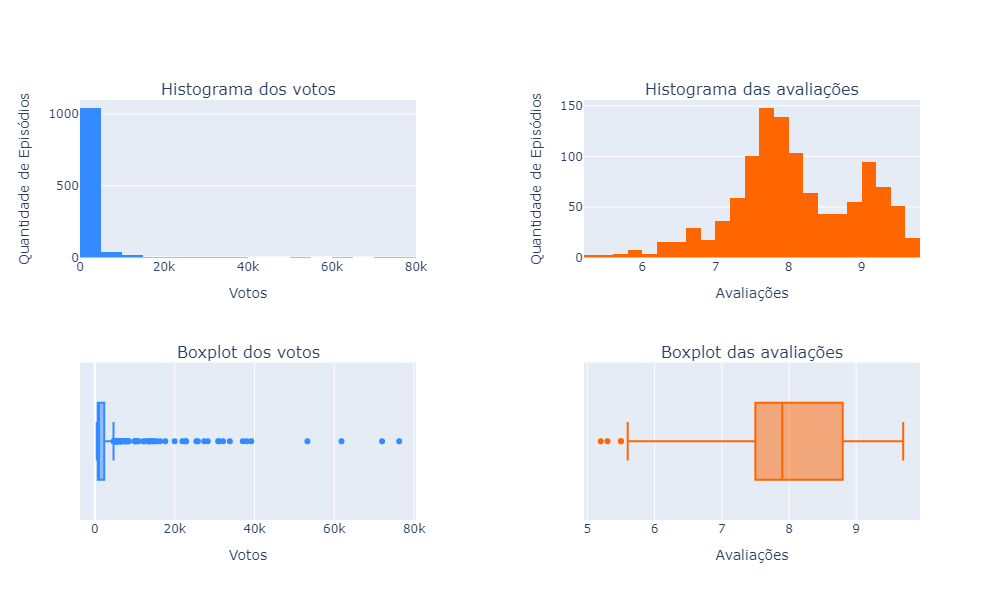

In [21]:
# Criando os subplots
fig = sp.make_subplots(rows=2, cols=2, vertical_spacing=0.25, horizontal_spacing=0.2, 
                       subplot_titles=['Histograma dos votos', 'Histograma das avaliações', 
                                       'Boxplot dos votos', 'Boxplot das avaliações'])
# Histogramas
# Primeiro subplot
fig.add_trace(go.Histogram(x=df['Votos'], nbinsx=30, marker_color='#338bff'), row=1, col=1)
fig.update_xaxes(title_text="Votos", row=1, col=1)
fig.update_yaxes(title_text="Quantidade de Episódios", row=1, col=1)

# Segundo subplot
fig.add_trace(go.Histogram(x=df['Avaliação'], marker_color='#FF6600'), row=1, col=2)
fig.update_xaxes(title_text="Avaliações", row=1, col=2)
fig.update_yaxes(title_text="Quantidade de Episódios", row=1, col=2)

# Boxplots
# Terceiro subplot
fig.add_trace(go.Box(x=df['Votos'], marker_color='#338bff', boxpoints='outliers', name=''), row=2, col=1)
fig.update_xaxes(title_text="Votos", row=2, col=1)

# Quarto subplot
fig.add_trace(go.Box(x=df['Avaliação'], marker_color='#FF6600', boxpoints='outliers', name=''), row=2, col=2)
fig.update_xaxes(title_text="Avaliações", row=2, col=2)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=600, width=1000, showlegend=False)
fig.show('png')

- A média de quantidade de votos é de 2415 votos e a média da avaliação média é de 8.05.
- A quantidade de votos está distribuida em sua maioria entre 0 a 3000 votos e existem diversos outliers com quantidades de votos acima do normal. A maior quantidade de votos foi de 76.272 e a menor foi de 481.
- Além disso, as avaliações estão mais concentradas entre 7.5 a 8, com a menor avaliação equivalente a 5.2 e a maior equivalente a 9.7.

In [22]:
maior_avaliacao = df[df['Avaliação'] == df['Avaliação'].max()]
maior_avaliacao

,Episódio,Arco,Tipo,Título,Lançamento,Votos,Avaliação
376,377,Thriller Bark,Canônico,Nakama no Itami wa Waga Itami: Zoro Kesshi no ...,2008-11-16,39203,9.7
404,405,Arquipélago de Sabaody,Canônico,Kesareta Nakama-tachi: Mugiwara Ichimi Saigo n...,2009-06-14,33820,9.7
481,482,Marineford,Canônico,Hi o mo Yaki Tsukusu Chikara: Akainu Hijou no ...,2011-01-09,31159,9.7
482,483,Marineford,Canônico,Kotae o Sagashite: Hiken Ace Senjou ni Shisu,2011-01-16,38033,9.7
483,484,Marineford,Canônico,Kaigun Honbu Houkai! Shirohige Kotobanaki Ikari!,2011-01-23,32122,9.7
484,485,Marineford,Canônico,Kejime o Tsukeru: Shirohige vs Kurohige Kaizok...,2011-01-30,37079,9.7
807,808,Ilha Whole Cake,Canônico,Kanashiki Kettou: Luffy tai Sanji (Kouhen),2017-10-01,27403,9.7
1014,1015,País de Wano,Canônico,Straw Hat Luffy! The Man Who Will Become the K...,2022-04-24,61811,9.7
1061,1062,País de Wano,Canônico,The Three-Sword Style of the Supreme King! Zor...,2023-05-21,76272,9.7
1088,1089,Egghead,Canônico,Entering a New Chapter! Luffy and Sabo's Paths!,2024-01-07,22869,9.7


- 14 episódios foram avaliados com a maior nota de todas, equivalente à 9.7. 
- Todos os episódios são canônicos e são episódios emblemáticos, pertencentes aos arcos de Thriller Bark, Arquipélago de Sabaody, Marineford, Ilha de Whole Cake, Wano e Egghead. 
- O episódio 1062 além de ter a avaliação máxima, também possui a quantidade de votos mais alta de todas.
- Vale notar que Egghead é o último arco que ainda está em lançamento e já possui avaliação 9.7 cinco vezes, dando a entender que os fãs estão gostando. Entretanto, esse arco apresenta uma quantidade de votos bem menor eu comparação aos episódios de destaque dos outros arcos.

In [23]:
menor_avaliacao = df[df['Avaliação'] == df['Avaliação'].min()]
menor_avaliacao

,Episódio,Arco,Tipo,Título,Lançamento,Votos,Avaliação
335,336,Ice Hunter,Filler,Shutsudou Chopperman! Mamore Nagisa no TV-kyoku,2007-12-23,763,5.2


- O episódio com a menor avaliação de todas é um Filler e não é o episódio com a menor quantidade de votos.

#### Qual a quantidade de episódios de cada tipo?

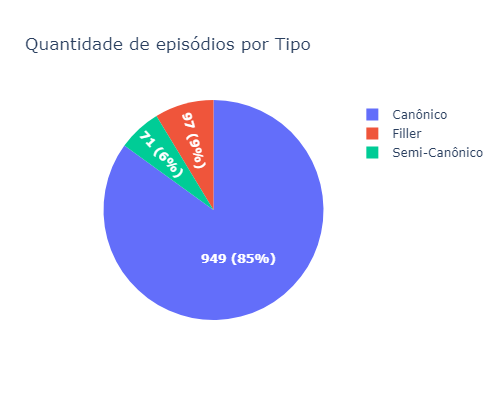

In [24]:
# Quantidade de episódios agrupados por tipo
eps_por_tipo = df.groupby('Tipo')['Episódio'].count()

fig = go.Figure()

# Plot principal
fig.add_trace(go.Pie(labels=eps_por_tipo.index, values=eps_por_tipo.values, textinfo='value+percent', insidetextorientation='auto', 
                     texttemplate='%{value:.0f} (%{percent:.0%})', textfont=dict(color='white', weight='bold')))

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=400, width=500, title = 'Quantidade de episódios por Tipo')
fig.show('png')

- Dos 1117 episódios, 97 episódios (9%) são filler, 71 (6%) são semi-canônicos e 949 (85%) são canônicos.
- Isso sugere que, no geral, uma esmagadora porcentagem dos episódios é relevante para a narrativa principal do anime, contemplando 1020 episódios (91%).

#### Qual é a avaliação média e quantidade de votos para cada tipo de episódio?

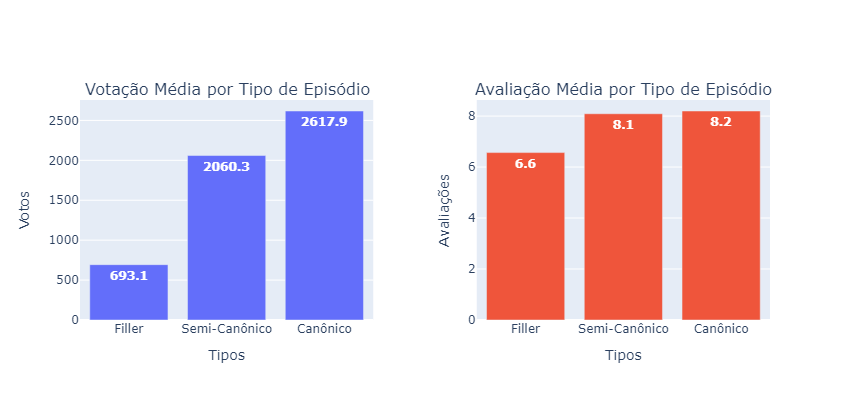

In [25]:
# Votação média agrupada por tipo de episódio, ordenado do menor para o maior
tipo_mean_votos = df.groupby('Tipo')['Votos'].mean().sort_values()

# Avaliação média agrupada por tipo de episódio, ordenado do menor para o maior
tipo_mean_avaliacao = df.groupby('Tipo')['Avaliação'].mean().sort_values()

fig = sp.make_subplots(rows=1, cols=2, horizontal_spacing=0.15, subplot_titles=['Votação Média por Tipo de Episódio', 
                                                                                'Avaliação Média por Tipo de Episódio'])

# Primeiro subplot
fig.add_trace(go.Bar(x=tipo_mean_votos.index, y=tipo_mean_votos.values, texttemplate="%{y:.1f}", 
                     textfont=dict(color='white', weight='bold')), row=1, col=1)
fig.update_xaxes(title_text="Tipos", row=1, col=1)
fig.update_yaxes(title_text="Votos", row=1, col=1)

# Segundo subplot
fig.add_trace(go.Bar(x=tipo_mean_avaliacao.index, y=tipo_mean_avaliacao.values, texttemplate="%{y:.1f}", textfont=dict(color='white', weight='bold')), row=1, col=2)
fig.update_xaxes(title_text="Tipos", row=1, col=2)
fig.update_yaxes(title_text="Avaliações", row=1, col=2)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=400, width=850, showlegend=False)
fig.show('png')

- A votação média indica que, como esperado, os episódios canônicos são mais votados do que semi-canônicos ou fillers.
- Apesar disso, os episódios semi-canônicos mostraram uma avaliação média bem próxima à dos episódios canônicos, enquanto que fillers continuou bem abaixo.

#### Qual a quantidade de episódios em cada arco? Quais são os maiores?

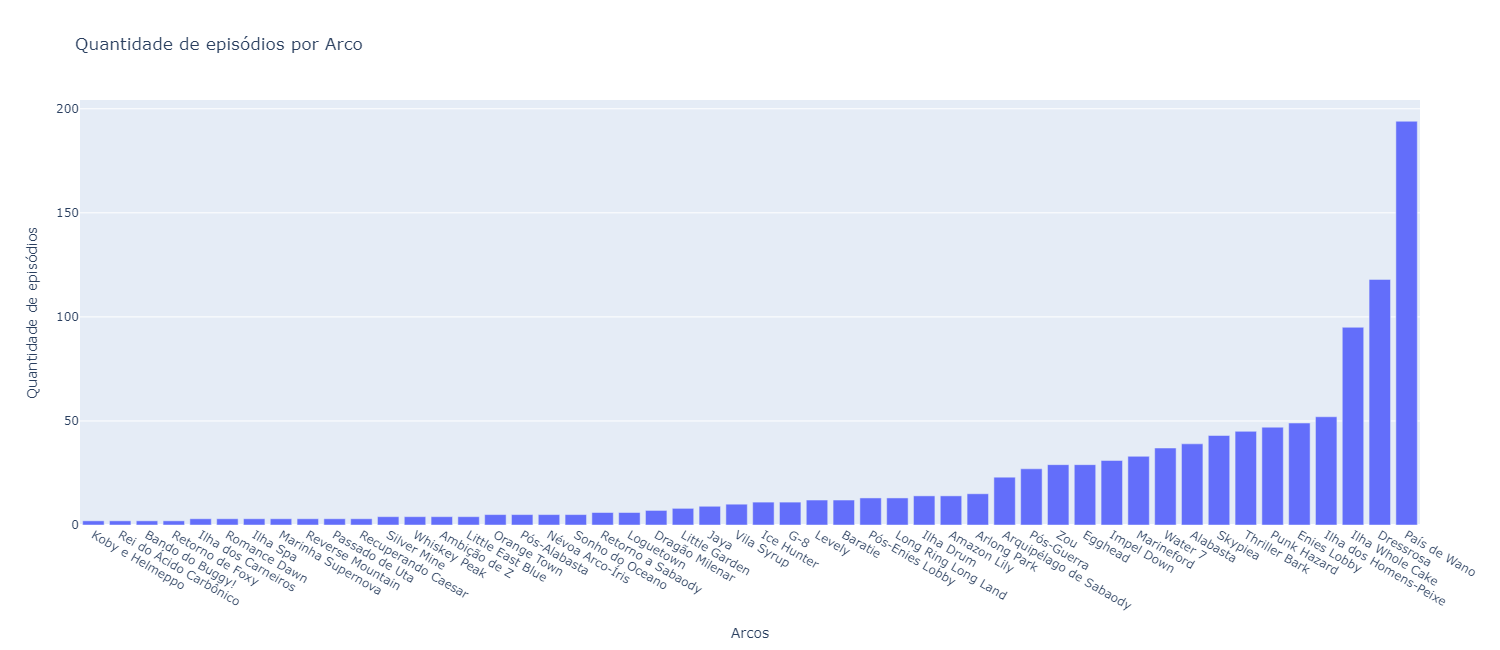

In [33]:
# Quantidade de episódios agrupados por arco, ordenado do menor para o maior
eps_por_arco = df.groupby('Arco')['Episódio'].count().sort_values()

fig = go.Figure()

# Plot principal
fig.add_trace(go.Bar(x=eps_por_arco.index, y=eps_por_arco.values))
fig.update_xaxes(title_text="Arcos")
fig.update_yaxes(title_text="Quantidade de episódios")

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(title= 'Quantidade de episódios por Arco', height=650, width=1500, showlegend=False)
fig.show('png')

- Os maiores arcos são, principalmente: País de Wano (194 episódios), Dressrosa (118 episódios) e Ilha Whole Cake (95 episódios).

#### Qual é a avaliação média e quantidade de votos em cada arco?

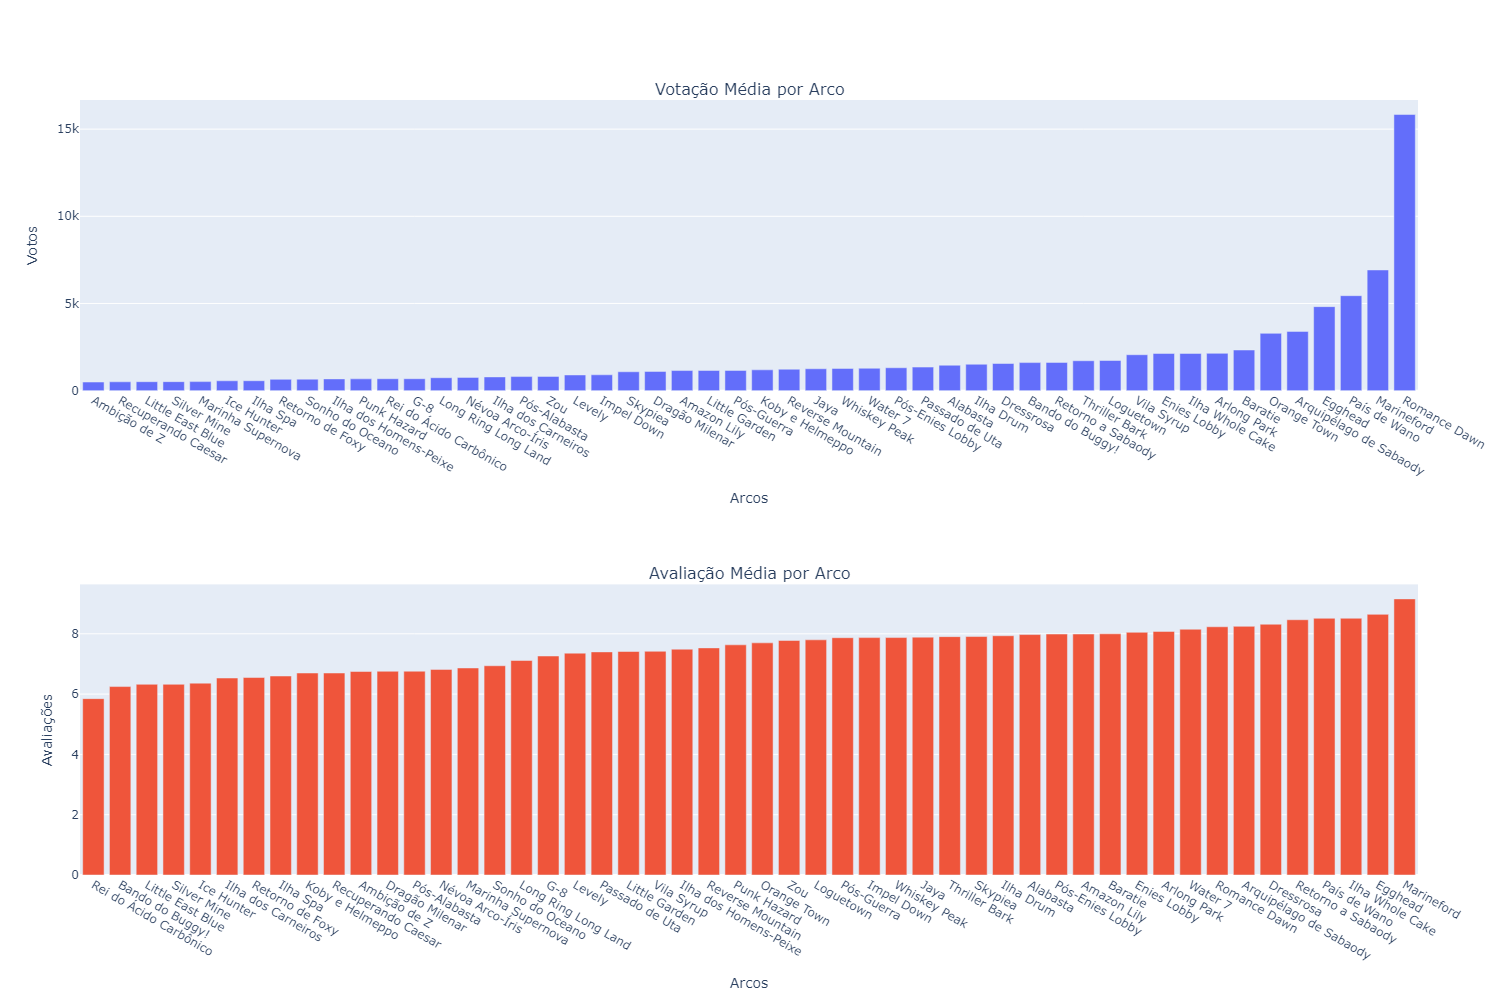

In [35]:
# Votação média agrupada por arco, ordenado do menor para o maior
arco_mean_votos = df.groupby('Arco')['Votos'].mean().sort_values()

# Avaliação média agrupada por arco, ordenado do menor para o maior
arco_mean_avaliacao = df.groupby('Arco')['Avaliação'].mean().sort_values()

fig = sp.make_subplots(rows=2, cols=1, subplot_titles=['Votação Média por Arco', 'Avaliação Média por Arco'])

# Primeiro subplot
fig.add_trace(go.Bar(x=arco_mean_votos.index, y=arco_mean_votos.values), row=1, col=1)
fig.update_xaxes(title_text="Arcos", row=1, col=1)
fig.update_yaxes(title_text="Votos", row=1, col=1)

# Segundo subplot
fig.add_trace(go.Bar(x=arco_mean_avaliacao.index, y=arco_mean_avaliacao.values), row=2, col=1)
fig.update_xaxes(title_text="Arcos", row=2, col=1)
fig.update_yaxes(title_text="Avaliações", row=2, col=1)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=1000, width=1500, showlegend=False)
fig.show('png')

- Curiosamente, o primeiro arco teve maior quantidade de votos, provavelmente por conta do começo de um anime famoso. Além disso, a votação se manteve em uma faixa de 2000 a 3000 votos, com exceção de alguns arcos, como Arquipélago de Sabaody, Egghead, País de Wano e, principalmente, Marineford.
- Apesar da quantidade mais baixa de votação média, os episódios continuaram mantendo uma boa avaliação média.
- Marineford foi o segundo arco com a maior quantidade média de votos e o que teve a maior avaliação média (9.15).

#### Quais arcos e com quantos episódios com avaliação média acima do 3º quartil (75%) existem? E abaixo do 1º quartil (25%)?

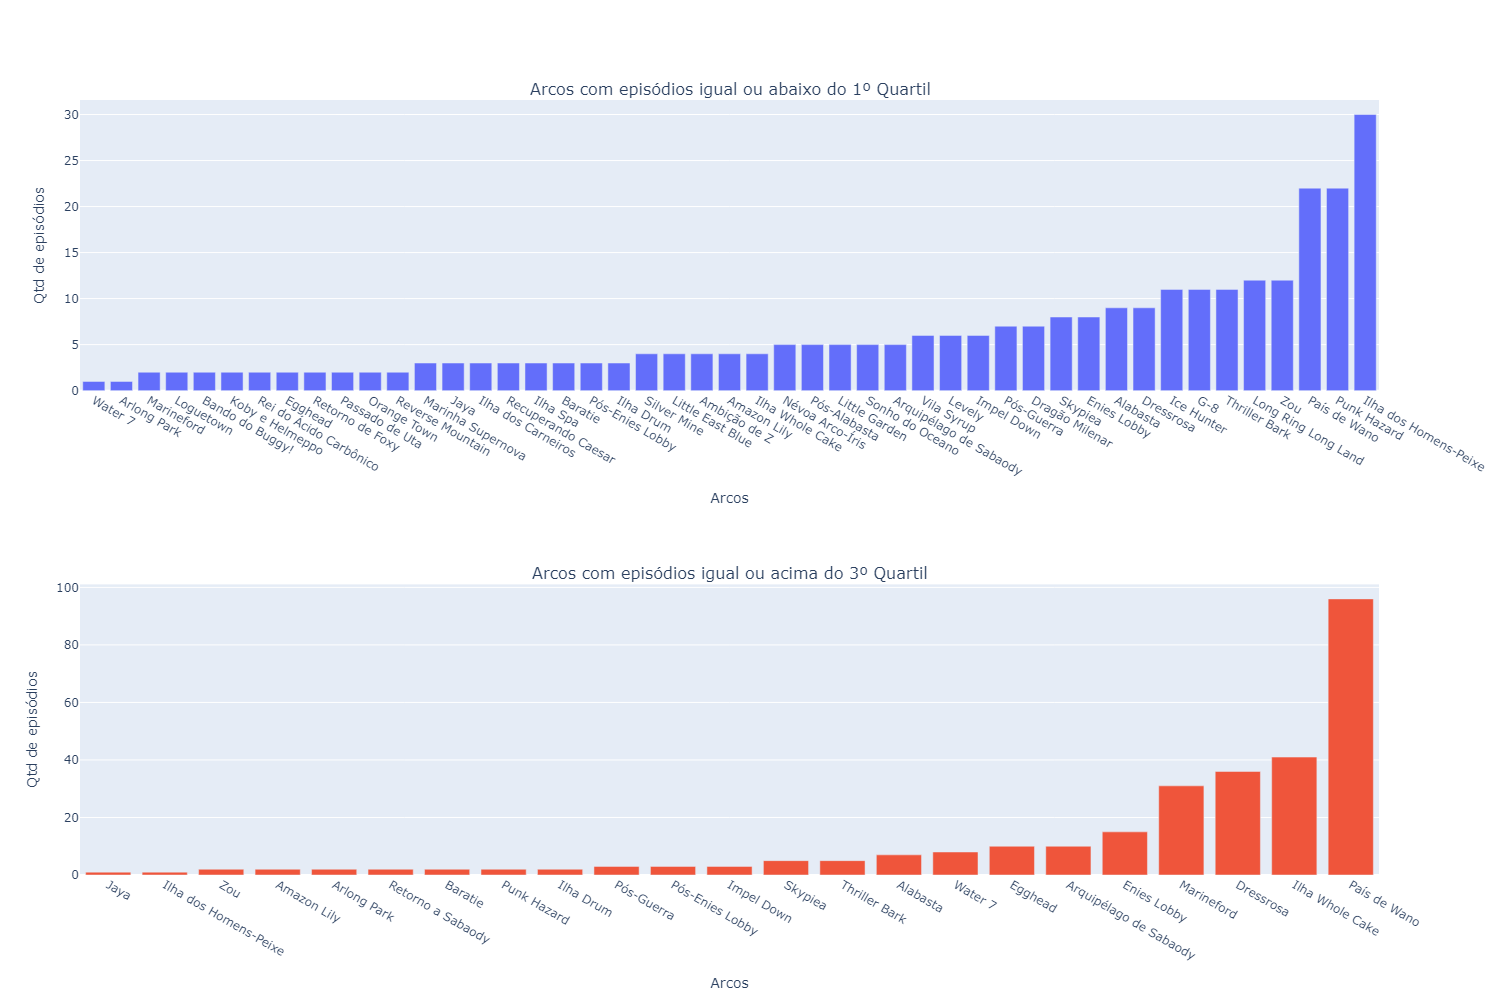

In [37]:
# Variável com a quantidade de avaliações igual ou abaixo do 1º quartil agrupada por arco, ordenado do menor para o maior
eps_menor_igual_a_q1 = df[df['Avaliação'] <= df['Avaliação'].quantile(0.25)]\
                                                            .groupby('Arco')['Episódio']\
                                                            .count()\
                                                            .sort_values()

# Variável com a quantidade de avaliações igual ou acima do 3º quartil agrupada por arco, ordenado do menor para o maior
eps_menor_igual_a_q3 = df[df['Avaliação'] >= df['Avaliação'].quantile(0.75)]\
                                                            .groupby('Arco')['Episódio']\
                                                            .count()\
                                                            .sort_values()

fig = sp.make_subplots(rows=2, cols=1, subplot_titles=['Arcos com episódios igual ou abaixo do 1º Quartil', 
                                                       'Arcos com episódios igual ou acima do 3º Quartil'])

# Primeiro plot
fig.add_trace(go.Bar(x=eps_menor_igual_a_q1.index, y=eps_menor_igual_a_q1.values), row=1, col=1)
fig.update_xaxes(title_text="Arcos", row=1, col=1)
fig.update_yaxes(title_text="Qtd de episódios", row=1, col=1)

# Segundo plot
fig.add_trace(go.Bar(x=eps_menor_igual_a_q3.index, y=eps_menor_igual_a_q3.values), row=2, col=1)
fig.update_xaxes(title_text="Arcos", row=2, col=1)
fig.update_yaxes(title_text="Qtd de episódios", row=2, col=1)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=1000, width=1500, showlegend=False)
fig.show('png')

- Os arcos com maior quantidade de episódios com avaliação abaixo do 1º quartil (7.5) foram, principalmente: Ilha dos Homens-Peixe (30 episódios), País de Wano e Punk Hazard (ambos com 22 episódios).
- Enquanto isso, os arcos com maior quantidade de episódios com avaliação acima do 3º quartil foram, principalmente: País de Wano com 96 episódios (49.5% do arco), Ilha Whole Cake com 41 episódios (43% do arco), Dressrosa com 36 episódios (30% do arco) e Marineford com 31 episódios (94% do arco).
- País de Wano está destacado em ambos provavelmente por conta do tamanho do arco, sugerindo episódios com menor e relevância, mas também muitos com grande relevância.  

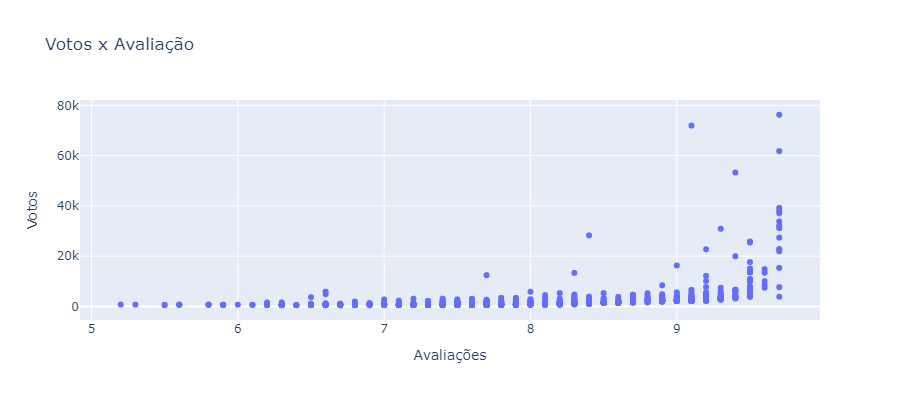

In [29]:
fig = go.Figure()

# Plot principal
fig.add_trace(go.Scatter(x=df['Avaliação'], y=df['Votos'], mode= 'markers'))

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(title="Votos x Avaliação", xaxis_title="Avaliações", yaxis_title="Votos", height=400, width=900)
fig.show('png')

- Não parece haver uma correlação fortemente considerável entre a quantidade de votos e a avaliação média. 

#### A quantidade de votos no anime aumentou ou diminuiu com o tempo? A avaliação média melhorou ou piorou?

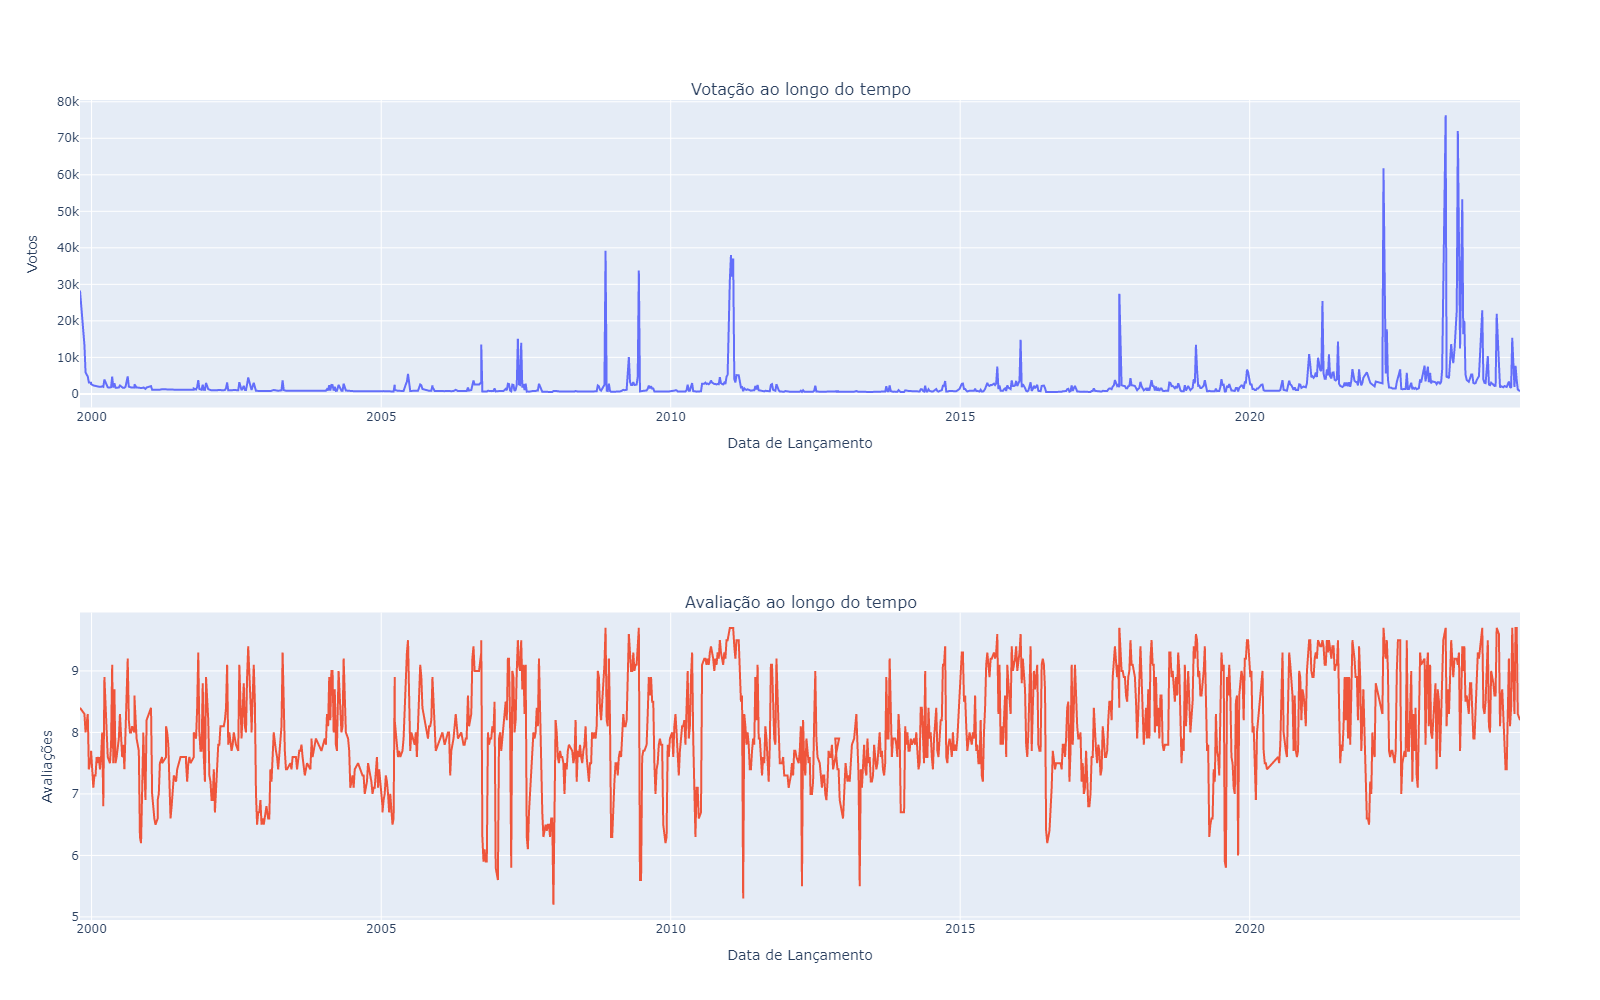

In [38]:
fig = sp.make_subplots(rows=2, cols=1, subplot_titles=['Votação ao longo do tempo', 
                                                       'Avaliação ao longo do tempo'])

# Primeiro plot
fig.add_trace(go.Scatter(x=df['Lançamento'], y=df['Votos'], mode='lines'), row=1, col=1)
fig.update_xaxes(title_text="Data de Lançamento", row=1, col=1)
fig.update_yaxes(title_text="Votos", row=1, col=1)

# Segundo plot
fig.add_trace(go.Scatter(x=df['Lançamento'], y=df['Avaliação'], mode='lines'), row=2, col=1)
fig.update_xaxes(title_text="Data de Lançamento", row=2, col=1)
fig.update_yaxes(title_text="Avaliações", row=2, col=1)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=1000, width=1600, showlegend=False)
fig.show('png')

- Ao longo tempo, não parece que houve uma mudança na quantidade de votos. No começo houve uma quantidade alta de votos (como visto anteriormente) e em seguida ocorreu uma queda que se manteve com alguns picos.
- Por volta de 2021 os picos começaram a se tornar mais frequentes, tendo um aumento na presença de episódios em destaque mais vezes. Isso sugere que a qualidade dos episódios e/ou da história pode estar melhorando e resultando nos picos com maior frequência, pois os telespectadores estão gostando e estão voltando a votar nos episódios que gostaram.
- As avaliações variaram bastante, mas manteve uma média que aumentou, principalmente, a partir de 2015. A notas que estão abaixo de 6 provavelmente são fillers.

In [31]:
# Avaliações abaixo de 6
df[df['Avaliação'] < 6]

,Episódio,Arco,Tipo,Título,Lançamento,Votos,Avaliação
279,280,Enies Lobby,Filler,"Otoko no Ikizama! Zoro no Waza, Usopp no Yume",2006-10-08,640,5.9
281,282,Enies Lobby,Filler,Wakare ga Otoko o Migaku! Sanji to Chopper,2006-10-22,633,5.9
282,283,Enies Lobby,Filler,Subete wa Nakama no Tame ni! Yami no Naka no R...,2006-10-29,636,5.9
290,291,Enies Lobby,Filler,Luffy Oyabun Futatabi! Yume ka Utsutsu ka Tomi...,2006-12-24,680,5.8
291,292,Enies Lobby,Filler,Oshiro de Mochimaki Dai Race! Akai Hana no Inbou,2007-01-07,749,5.6
302,303,Enies Lobby,Filler,Hannin wa Luffy Oyabun? Kieta Oozakura o Oe,2007-04-01,697,5.8
335,336,Ice Hunter,Filler,Shutsudou Chopperman! Mamore Nagisa no TV-kyoku,2007-12-23,763,5.2
405,406,Arquipélago de Sabaody,Filler,Jidaigeki Tokubetsu Hen: Luffy Oyabun Futatabi...,2009-06-21,672,5.6
406,407,Arquipélago de Sabaody,Filler,Jidaigeki Tokubetsu Hen: Yabure! Thriller Shou...,2009-06-28,655,5.6
491,492,Pós-Guerra,Filler,"Saikyou Tag! Funtou, Luffy to Toriko!",2011-04-03,748,5.3


- Os picos do gráfico abaixo de avaliação 6 são todos referentes à episódios Filler.

#### Os fillers foram sendo menos votados e tiveram menos avaliações com o tempo?

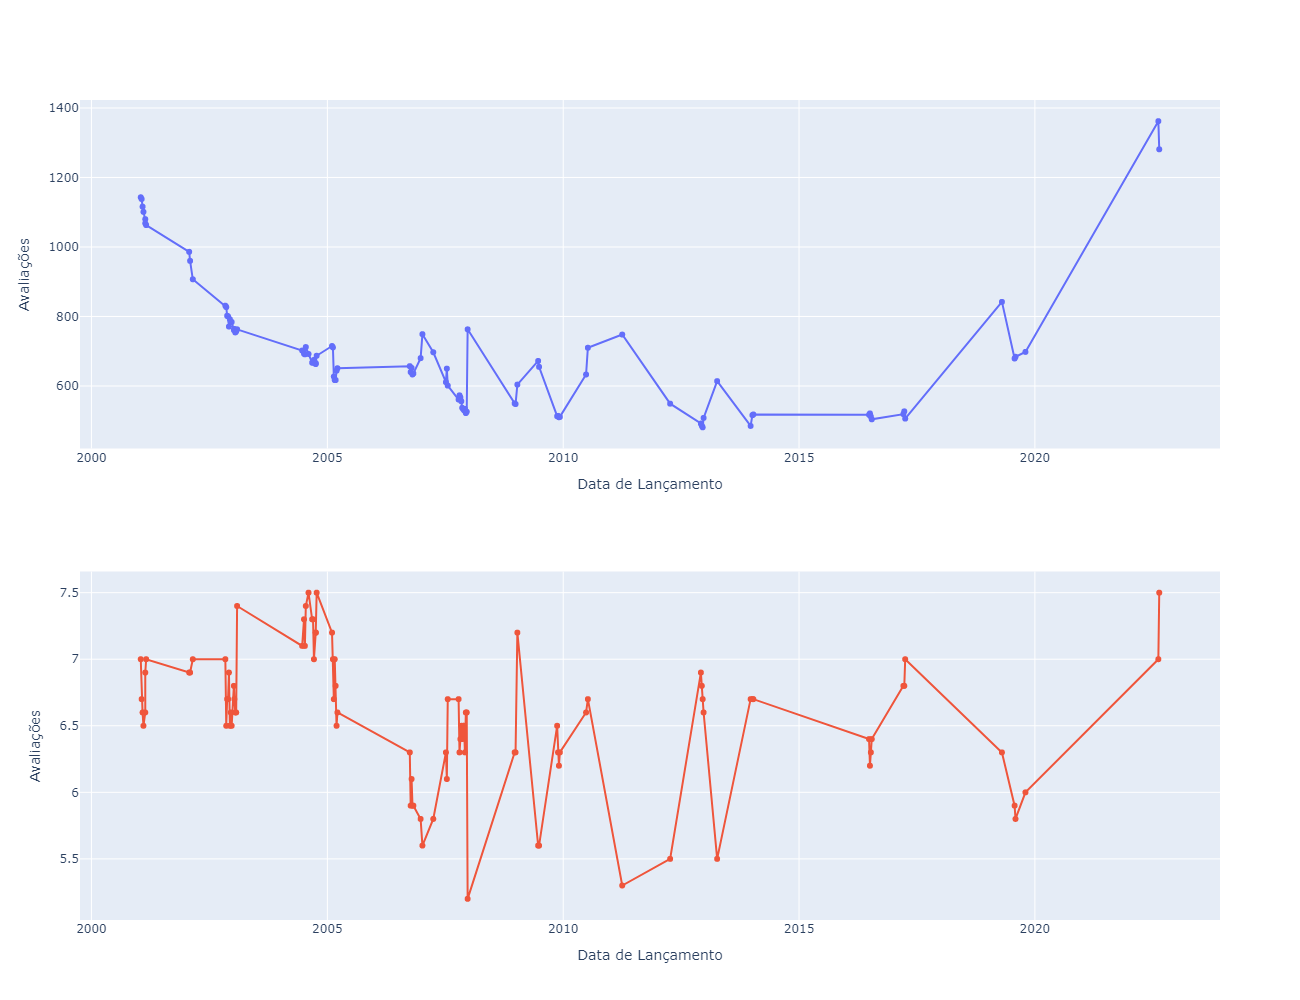

In [40]:
# Dataframe apenas com os episódios do tipo filler
df_filler = df[df['Tipo'].isin(['Filler'])]

fig = sp.make_subplots(rows=2, cols=1)

# Primeiro plot
fig.add_trace(go.Scatter(x=df_filler['Lançamento'], y=df_filler['Votos'], mode='lines+markers'), row=1, col=1)
fig.update_xaxes(title_text="Data de Lançamento", row=1, col=1)
fig.update_yaxes(title_text="Avaliações", row=1, col=1)

# Segundo plot
fig.add_trace(go.Scatter(x=df_filler['Lançamento'], y=df_filler['Avaliação'], mode='lines+markers'), row=2, col=1)
fig.update_xaxes(title_text="Data de Lançamento", row=2, col=1)
fig.update_yaxes(title_text="Avaliações", row=2, col=1)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=1000, width=1300, showlegend=False)
fig.show('png')

- Pelo que pode ser observado, os episódios fillers apresentam uma queda com o tempo da votação, voltando a subir entre 2015 e atualmente.
- Já sobre as avaliações, há uma variação grande que impede de criar muitas conclusões a respeito, pois alguns episódios vão bem mas logo em seguida há um filler com uma queda considerável de avaliação.
- Uma questão a ser considerada é que fillers seguidos aparentam ter avaliações variando menos do que episódios únicos espalhados ao longo do tempo. Isso sugere que os telespectadores aceitam mais fillers em sequência (como arcos filler, por exemplo), do que um episódio filler avulso no meio de um arco.

#### Conclusão

- A maioria dos episódios (91%) é canônica/semi-canônica e bem recebida pelos fãs, com uma avaliação média de 8.05 e uma média de 2415 votos. Picos recentes de votos sugerem um aumento na qualidade percebida dos episódios a partir de 2021.
- O arco mais recente, Egghead, já acumula 5 avaliações máximas (9.7), sugerindo que os fãs estão satisfeitos com o rumo atual da história, que está, inclusive, em sua reta final. 
- País de Wano (96 episódios), Ilha Whole Cake (41 episódios), Dressrosa (36 episódios) e Marineford (31 episódios) foram arcos que tiveram boas quantidades de episódios com avaliação acima de 8.8. Além disso, Marineford destacou-se como o arco preferido dos telespectadores, pois teve a melhor avaliação média (9.15), 94% do arco possui avaliação acima de 8.8 e apresenta uma das maiores quantidades de votos.
- Não foi observada uma correlação forte entre a quantidade de votos e a avaliação. 
- Episódios fillers apresentam avaliações e engajamento consideravelmente menores, principalmente quando lançados de forma avulsa e única no meio de um arco canônico.